<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Homework 3: Feature Engineering and Model Training </h1>
    <h3></h3>
</center>

### 1. Problem

1) Use linear regression models with regularization terms to predict the sales volume of air conditioning.

2) Adopt appropriate feature engineering methods to process features.

3) Use cross-validation method for hyper-parameter tuning, i.e. adjusting $\lambda$ of the regularization term.

4) Draw a residual plot and print MSE and R-squared metrics to measure the performance of the model on the test set.


### 2. Data processing

In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv('Air_conditioning.csv')
data.head()  # Display the first 5 rows of data

,Air Temperature,Price,Cost,Profit,Sales Promotion,House Sales Volume,Search Volume on E-commerce,Changes in Brand Reputation,Number of Advertisements,Region,Sales Volume
0,27.5,2185.0,1217.0,968.0,Yes,1050,7.41,0.48,0.93,South,389.0
1,39.0,2542.0,1434.0,1108.0,Yes,1040,11.20,1.41,1.53,North,290.0
2,34.6,2873.0,1662.0,1211.0,No,1016,36.77,1.58,0.71,West,185.0
3,32.0,2732.0,1608.0,1124.0,No,1072,5.57,0.68,0.08,North,185.0
4,23.1,2807.0,1680.0,1127.0,Yes,1007,8.50,5.94,0.19,South,322.0


In [19]:
# Split the training set and test set
train_data = data.iloc[:800,:]
test_data = data.iloc[800:,:]


### 3. Feature Engineering

In [20]:
#label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import PowerTransformer

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
pt = PowerTransformer(method='box-cox')

# one-hot encoding
Sales_Promotion = label_encoder.fit_transform(data['Sales Promotion']).reshape(-1, 1)
Region = onehot_encoder.fit_transform(data[['Region']])

# standardization
temperature = scaler.fit_transform(data[['Air Temperature']])
price = scaler.fit_transform(data[['Price']])
cost = scaler.fit_transform(data[['Cost']])
profit = scaler.fit_transform(data[['Profit']])
sales_volume = scaler.fit_transform(data[['House Sales Volume']])

# Box-Cox transformation
search_volume = pt.fit_transform(data[['Search Volume on E-commerce']])
changes = pt.fit_transform(data[['Changes in Brand Reputation']])
Num_of_advertisements = pt.fit_transform(data[['Number of Advertisements']])

X = np.concatenate((Sales_Promotion, Region, temperature, price, cost, profit, sales_volume, search_volume,changes, Num_of_advertisements), axis=1)
y = data['Sales Volume'].values

X_train, y_train, X_test, y_test = X[:800,:], y[:800], X[800:,:], y[800:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(800, 13) (800,) (200, 13) (200,)


#### Correlation Matrix Heatmap

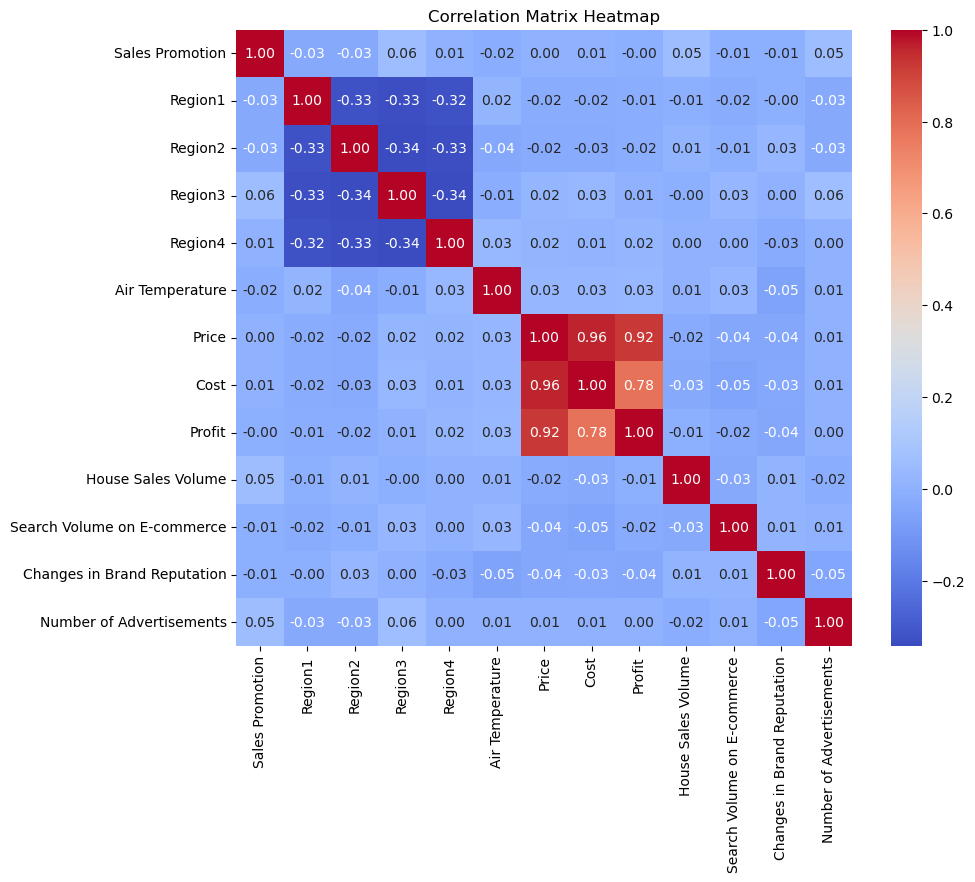

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

X_columns = ['Sales Promotion', 'Region1', 'Region2', 'Region3', 'Region4', 'Air Temperature', 'Price', 'Cost', 'Profit', 'House Sales Volume', 'Search Volume on E-commerce', 'Changes in Brand Reputation', 'Number of Advertisements']
X_df = pd.DataFrame(X, columns=X_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 4. Model Training and Prediction

In [ ]:
# Using cross-validation to tune the hyper-parameter in Lasso Regression
from sklearn.linear_model import LassoCV

model = LassoCV(cv=10).fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % model.alpha_)

# Prediction
y_pred = model.predict(X_test)


Best alpha using built-in LassoCV: 0.027601


### 5. Performance metrics

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 19.333112275024348
R^2 Score: 0.9962801336382996


### 6. Residual Plot

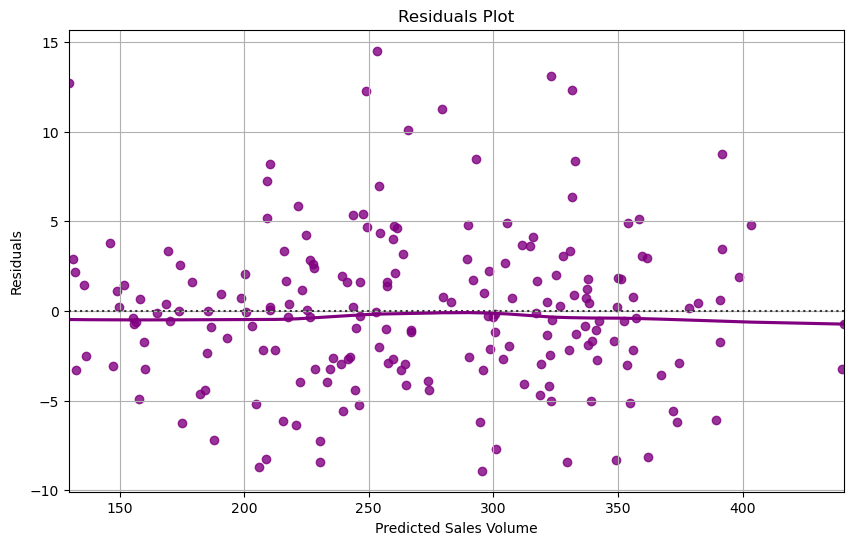

In [24]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="purple")
plt.title('Residuals Plot')
plt.xlabel('Predicted Sales Volume')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()